[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/billydavila/CSC448/blob/main/Equation%20of%20a%20Slime/Equation%20of%20a%20Slime.ipynb)


# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, model_selection, preprocessing, pipeline

import matplotlib.pyplot as plt

***
## Part 1. Loading the dataset

In [2]:
# Using pandas load the dataset (load remotely, not locally)
try:
    dataset = pd.read_csv("https://raw.githubusercontent.com/profmcnich/example_notebook/main/science_data_large.csv")
except:
    dataset = pd.read_csv( "https://raw.githubusercontent.com/billydavila/CSC448/main/Equation%20of%20a%20Slime/science_data_large.csv")    

In [3]:
# Output the first 15 rows of the data
dataset.head(15)

,Temperature °C,Mols KCL,Size nm^3
0,469,647,6.244743e+05
1,403,694,5.779610e+05
2,302,975,6.196847e+05
3,779,916,1.460449e+06
4,901,18,4.325726e+04
5,545,637,7.124634e+05
6,660,519,7.006960e+05
7,143,869,2.718260e+05
8,89,461,8.919803e+04
9,294,776,4.770210e+05


In [4]:
# Display a summary of the table information (number of datapoints, etc.)
dataset.info()  # Technical summary of my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature °C  1000 non-null   int64  
 1   Mols KCL        1000 non-null   int64  
 2   Size nm^3       1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [5]:
dataset.describe() # Display the Descriptive statistics 

,Temperature °C,Mols KCL,Size nm^3
count,1000.000000,1000.000000,1.000000e+03
mean,500.500000,471.530000,5.086111e+05
std,288.819436,288.482872,4.474838e+05
min,1.000000,1.000000,1.611429e+01
25%,250.750000,226.750000,1.298267e+05
50%,500.500000,459.500000,3.827182e+05
75%,750.250000,710.250000,7.603211e+05
max,1000.000000,1000.000000,1.972127e+06


***
## Part 2. Splitting the dataset

#### Take the pandas dataset and split it into our features (X) and label (y)

In [6]:
# Get the columns name
featuresAndLabel = dataset.columns.tolist()
print( featuresAndLabel) 

# Get the feature names and label name
featureName1 = featuresAndLabel[0] 
featureName2 = featuresAndLabel[1]
labelName = featuresAndLabel[2]

# features (X) 
X = dataset[ [featureName1, featureName2] ] # in our case is the temperature (C) and KCL (Mols)

# Label (Y)
Y = dataset[[labelName]] # in our case is the size (nm^3)

['Temperature °C', 'Mols KCL', 'Size nm^3']


In [7]:
X.head(3)

,Temperature °C,Mols KCL
0,469,647
1,403,694
2,302,975


In [8]:
Y.head(3)

,Size nm^3
0,624474.2571
1,577961.0286
2,619684.7143


In [9]:
# Check the shapes 
X.shape, Y.shape

((1000, 2), (1000, 1))

#### Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)

In [10]:
# split the set into training and test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X, Y, train_size = 0.9, test_size = 0.1,
                                                                     shuffle = True, random_state = 1729)

In [11]:
# Check the shapes
print ( X_train.shape, X_test.shape )
print( Y_train.shape, Y_test.shape )

(900, 2) (100, 2)
(900, 1) (100, 1)


***
## Part 3. Perform a Linear Regression

In [12]:
# Use sklearn to train a model on the training set
linearRegression = linear_model.LinearRegression()
linearRegression.fit( X_train, Y_train)

LinearRegression()

In [13]:
# Create a sample datapoint and predict the output of that sample with the trained model

sampleDataPoint = X[:1] # Create a sample datapoint
myPrediction = linearRegression.predict(sampleDataPoint)[0][0]  # Make the prediction using the trained model 

# Display to console
print("Sample Data point:")
print( sampleDataPoint.to_string(index = False) )
print("Prediction:")
print(myPrediction)

Sample Data point:
 Temperature °C  Mols KCL
            469       647
Prediction:
665459.334950311


In [14]:
# Report on the score for that model, in your own words (markdown, not code) explain what the score means

train_score = linearRegression.score( X_train, Y_train) # Calculate the score from the training data set
test_score = linearRegression.score(X_test, Y_test)     # Calculate the score from the test data set

# Display to console
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  0.8608884948885767
The test score of model is:  0.8582642046211177


#### What does the score() method returns? 
* From the [scikit learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), we know that the score() method return the coefficient of determination of the prediction. It is also called $R^2$ score and it is used to evaluate the performance of a linear regression model. 
* $R^2$ is a measure of the goodness of fit of a model.
* In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points.
* The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). An $R^2$ of 1 indicates that the regression predictions perfectly fit the data. 
* Hence, the closer the score value is to one, the better.

#### What does the score we got tell us?
* We got training score $R^2 = 0.86089$ and a test score $R^2 = 0.85826$ , which tells us that there is a strong linear relationship between the features and the label variable.

***
**Note: When writing your output equations for your sample outputs you can ignore outside of 5 significant figures. (e.g. 0.000003 is just 0)**

In [15]:
# Extract the coefficients and intercept from the model and write an equation for your h(x) using LaTeX

# Extract the coefficients and intercept from the model 
interceptOfLinearRegression = linearRegression.intercept_
coefficientsOfLinearRegression = linearRegression.coef_

# Display to console 
theta_0 = interceptOfLinearRegression[0] 
print( "Intercept: ", end = '' ) 
print(  "{:0.5f}".format(theta_0) )

print( "\nCoefficients: " )
for i in range( len(coefficientsOfLinearRegression[0])  ):
    theta_i = coefficientsOfLinearRegression[0][i]
    print( f"x_{i+1} = ", end = '')
    print( "{:0.5f}".format(theta_i) )    

Intercept: -413047.70917

Coefficients: 
x_1 = 867.68221
x_2 = 1037.96613


## Write an equation for your h(x) using LaTeX

### Linear Regresion Equation

##  <center> $ h(x) = \theta_{0} + \theta_{1}\cdot x_{1} + \theta_{2}\cdot x_{2}$  where  $x = \begin{bmatrix} x_1\\x_2\end{bmatrix}$</center>



##  <center> $ h(x) = -413047.70917 + 867.68221 x_{1} + 1037.96613x_{2}$ </center>


***
## Part 4. Use Cross Validation

In [16]:
# Use the cross_val_score function to repeat your experiment across many shuffles of the data

# Repeats K-Fold 5 times with different randomization in each repetition (200).
kf = model_selection.RepeatedKFold( n_splits = 5, random_state = 1729, n_repeats = 200 ,)

lm = linear_model.LinearRegression() # my linear regression model

# Use the cross_val_score function to repeat the experiment accross many (1000) shuffles of the data
crossValidationScores = model_selection.cross_val_score(lm, X, Y, cv = kf)
crossValidationScores[:20]

array([0.85853979, 0.87000344, 0.85211331, 0.86439828, 0.85320168,
       0.88151951, 0.84474721, 0.85593249, 0.86408968, 0.85085729,
       0.85748265, 0.85824071, 0.85290043, 0.84341584, 0.87765543,
       0.84203408, 0.87916173, 0.85550679, 0.85528972, 0.86878518])

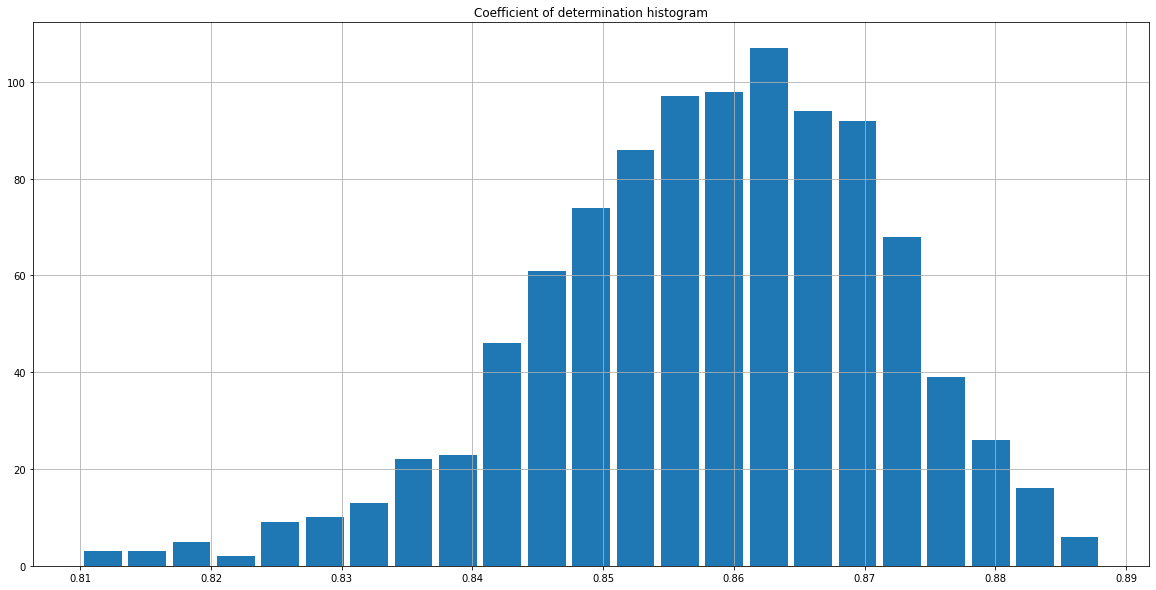

In [17]:
# Show a histogram to see where the scores (Coefficient of determination) are accumulated
plt.figure( figsize = (20,10))
plt.hist(crossValidationScores, bins = 'auto', rwidth = 0.85)
plt.title( "Coefficient of determination histogram")
plt.grid(True)
plt.show()

In [18]:
# Report on their finding and their significance

# Display the mean and std of the scores to the console
print("%0.5f accuracy with a standard deviation of %0.5f" % ( crossValidationScores.mean(), crossValidationScores.std()))

0.85805 accuracy with a standard deviation of 0.01319


### Report on their finding and their significance
#### What is cross-validation? 
* [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is a resampling method that uses different portions of the data to test and train a model on different iterations. 
* The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

#### Report on their finding and their significance:
* We used the [cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) function to repeat our experiment across many randomized shuffles (1000) of our data. 
* We can see from the histogram plot that most of the values (two-thirds of 1000) are in the range of 0.85 to 0.87. A range very close to what we got before (0.86088).
* The mean of the scores was 0.85798 (very close to what we got before 0.86088).  
* From the findings, we can conclude that the model's ability to predict new data is pretty good since as stated previously, the closer $R^2$ is to 1, the better.

***
## Part 5. Using Polynomial Regression

In [19]:
# Using the PolynomialFeatures library perform another regression on an augmented dataset of degree 2

# Polynomial regression of degree 2
polynomialModel = preprocessing.PolynomialFeatures( degree = 2) 

# Perform the data augmentation 
X_augmented_degree_2 = polynomialModel.fit_transform(X)

# Split the data (same as before: train 90%, test 10%)
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = model_selection.train_test_split(
                                            X_augmented_degree_2, Y, 
                                            train_size = 0.9, test_size = 0.1, 
                                            shuffle = True, random_state = 1729)

# Perform the Regression
polynomialRegression = linear_model.LinearRegression()
polynomialRegression.fit( X_augmented_train, y_augmented_train)

LinearRegression()

In [20]:
# Report on the metrics and output the resultant equation as you did in Part 3.

# Report on the metrics
train_score = polynomialRegression.score( X_augmented_train, Y_train) # Calculate the score from the training data set
test_score = polynomialRegression.score( X_augmented_test, Y_test) # Calculate the score from the test data set

# Display to console 
print("The training score of model is: ", train_score)
print( "The test score of model is: ", test_score )

The training score of model is:  1.0
The test score of model is:  1.0


### Report on the metrics
#### What does the score from the Polynomial Regression tell us?
* We got training score $R^2 = 1$ and a test score $R^2 = 1$, which tell us we have a perfect linear relationship between the features and the label variables.

**Note: When writing your output equations for your sample outputs you can ignore outside of 5 significant figures. (e.g. 0.000003 is just 0)**

In [21]:
# Output the resultant equation as you did in Part 3.

# Extract the coefficients and intercept from the model
interceptOfPolynomialRegression = polynomialRegression.intercept_
coefficientsOfPolynomialRegression = polynomialRegression.coef_

# Display to console

intercept = interceptOfPolynomialRegression[0]
print( "Intercept: ", end = '' ) 
print(  "{:0.5f}".format(intercept) )

print( "\nCoefficients: " ) # [1, x_1, x_2, x_1^2 , x_1x_2, x_2^2 ]
setMatch = ['1', 'x_1', 'x_2', 'x_1^2', 'x_1x_2', 'x_2^2']
for i in range( len(coefficientsOfPolynomialRegression[0]) ):
    coeff_i = coefficientsOfPolynomialRegression[0][i]
    print( f"{setMatch[i]} = ", end = '' )
    print( "{:0.5f}".format(coeff_i) )

Intercept: 0.00001

Coefficients: 
1 = 0.00000
x_1 = 12.00000
x_2 = -0.00000
x_1^2 = 0.00000
x_1x_2 = 2.00000
x_2^2 = 0.02857


## Polynomial Regresion Equation
**Recall: The features of x has been transformed from $[x_1, x_2]$ to $[1, x_1, x_2, x_1^2 , x_1x_2, x_2^2 ]$** 

## <center> $h(x) = 0.00001 + 0 \cdot1 + 12\cdot x_1 - 0\cdot x_2 + 0 \cdot x_1^2 + 2\cdot x_1 \cdot x_2 + 0.02857 \cdot x_2^2$ </center>

## <center> $h(x) = 0.00001 + 12\cdot x_1 + 2\cdot x_1 \cdot x_2 + 0.02857 \cdot x_2^2$ </center>

***
## References: 
1. [Pandas: "How do I read and write tabular data?"](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)
2. [Pandas: "How do I select a subset of a DataFrame?"](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
3. [Scikit learn: train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
4. [Scikit learn: Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)
5. [Scikit learn: Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
6. [Scikit learn: Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
7. [Scikit learn: Polynomial Regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)
